In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys
import os
from sklearn.metrics import roc_curve, roc_auc_score

### LOADING METRICS

In [8]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..'))
PROCESSED_DATA_PATH = os.path.join(BASE_DIR, 'data', 'processed')

In [10]:
try:
    with open(os.path.join(PROCESSED_DATA_PATH, 'dt_metrics.json'), 'r') as f:
        dt_metrics = json.load(f)
        
    with open(os.path.join(PROCESSED_DATA_PATH, 'nn_metrics.json'), 'r') as f:
        nn_metrics = json.load(f)

    # Combine into a DataFrame
    df_results = pd.DataFrame([dt_metrics, nn_metrics])
    
    print("[SUCCESS] Successfully loaded metrics from files.")
    display(df_results)
    
except FileNotFoundError:
    print("[ERROR] Metrics files not found. Please run Notebooks 03 and 04 first to generate 'dt_metrics.json' and 'nn_metrics.json'.")

[SUCCESS] Successfully loaded metrics from files.


,Model,Accuracy,F1-Score (Churn),ROC-AUC
0,Decision Tree,0.740951,0.619395,0.832086
1,Neural Network,0.793471,0.593007,0.840598


### VISUALIZE SCALAR METRICS

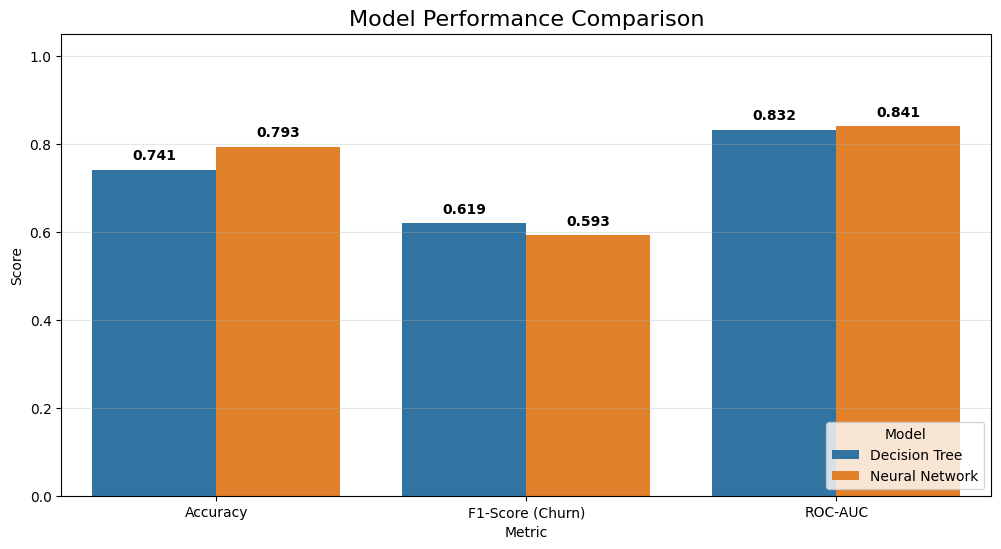

In [11]:
# Melt for easy plotting with Seaborn
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette=['#1f77b4', '#ff7f0e'])

plt.title("Model Performance Comparison", fontsize=16)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.legend(loc='lower right', title='Model')
plt.grid(axis='y', alpha=0.3)

# Add labels
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', fontsize=10, fontweight='bold')
plt.show()

### COMBINED ROC CURVE

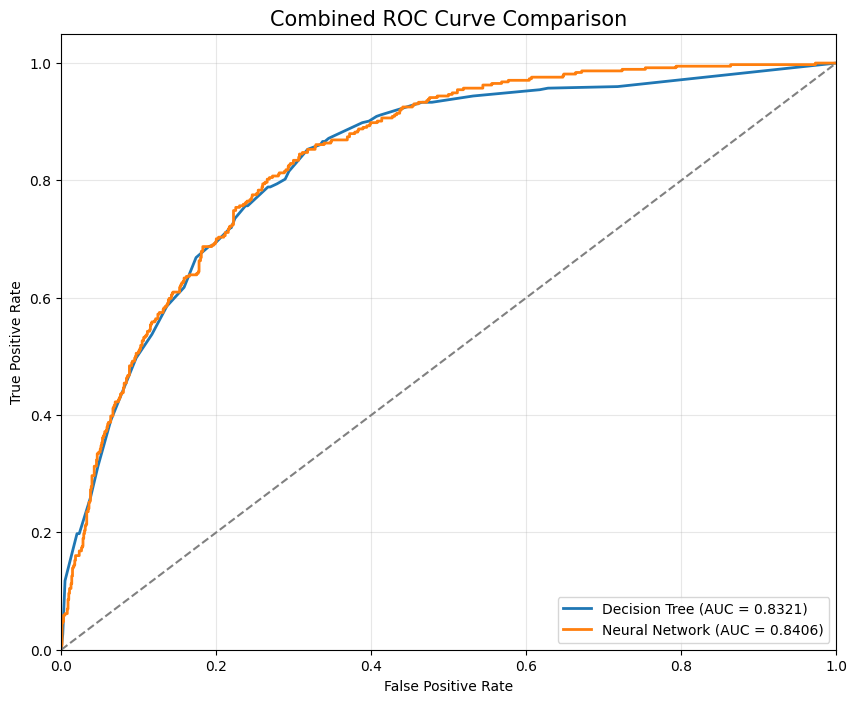

In [12]:
# Load the saved probability files
try:
    y_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'))
    y_prob_dt = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'dt_probs.csv'))
    y_prob_nn = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'nn_probs.csv'))

    # Generate Curves
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
    fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
    
    # Plot
    plt.figure(figsize=(10, 8))
    
    # Decision Tree Line
    plt.plot(fpr_dt, tpr_dt, 
             label=f"Decision Tree (AUC = {dt_metrics['ROC-AUC']:.4f})", 
             color='#1f77b4', lw=2)
             
    # Neural Network Line
    plt.plot(fpr_nn, tpr_nn, 
             label=f"Neural Network (AUC = {nn_metrics['ROC-AUC']:.4f})", 
             color='#ff7f0e', lw=2)
             
    # Random Guess Line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC Curve Comparison', fontsize=15)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
except FileNotFoundError:
     print("[ERROR] Probability CSV files not found. Run previous notebooks to generate them.")